## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [12]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

In [13]:
# Your code here
boston_cont = boston_features.iloc[:, 0:10]
boston_cont.drop(columns='CHAS', axis=1, inplace=True)

    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfafae2cf8>,
      dtype=object)

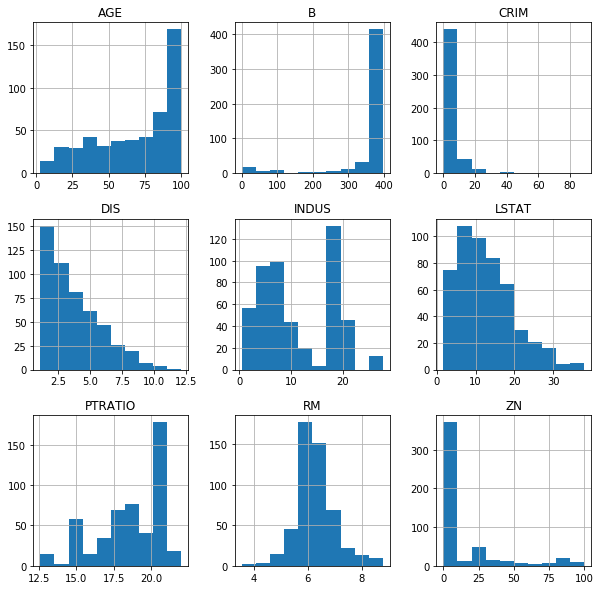

In [14]:
boston_cont.hist(figsize = [10,10])

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfaf67f9b0>,
      dtype=object)

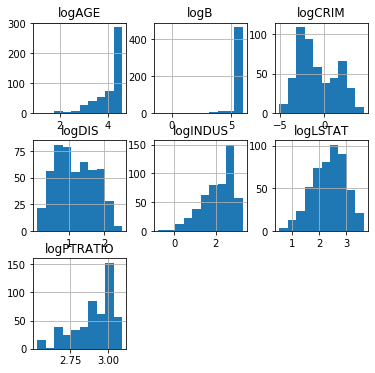

In [15]:
# Your code here
import numpy as np
# Instantiating an empty df
boston_log = pd.DataFrame([])
boston_log['logB'] = np.log(boston_cont['B'])
boston_log['logCRIM'] = np.log(boston_cont['CRIM'])
boston_log['logAGE'] = np.log(boston_cont['AGE'])
boston_log['logCRIM'] = np.log(boston_cont['CRIM'])
boston_log['logDIS'] = np.log(boston_cont['DIS'])
boston_log['logINDUS'] = np.log(boston_cont['INDUS'])
boston_log['logLSTAT'] = np.log(boston_cont['LSTAT'])
boston_log['logPTRATIO'] = np.log(boston_cont['PTRATIO'])
boston_log.hist(figsize = [6,6])

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [20]:
# Your code here
boston_log['logZN'] = np.log(boston_cont['ZN'])
boston_log.drop(columns='logZN', axis=1, inplace=True)
boston_cont['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

Look at that. More than half of the values are 0.

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

I can decide to drop certain columns if they seem unhelpful or too difficult to work with.  
I can apply any of the transformations I learned before to see if they help.  
**Bonus** Create a regression model.

**Observations**  
Seems that those with skew have been positively affected by the log transformation with the exception of AGE and B.  
Final data will not log transform those columns.

In [ ]:
features_final = pd.DataFrame([])
# MNorm
features_final['AGE'] = ((boston_cont['AGE']-boston_cont['AGE'].mean())/(boston_cont['AGE'].max()-boston_cont['AGE'].min()))
#MMSc
features_final['B'] = ((boston_cont['B']-boston_cont['B'].min())/(boston_cont['B'].max()-boston_cont['B'].min()))
# LogTrans




features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS']   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))










## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!